# 랜덤 포레스트 (Random Forest)

랜덤 포레스트는 앙상블 학습 방법의 한 종류로, 여러 개의 결정 트리(Decision Tree)를 학습시켜 그 결과를 종합하여 예측 성능을 높이는 알고리즘임. 분류(Classification)와 회귀(Regression) 문제에 모두 사용할 수 있으며, 개별 결정 트리의 단점인 과적합(Overfitting)을 방지하는 데 매우 효과적임.

이 모델은 훈련 과정에서 데이터 샘플과 특성(feature)을 무작위로 선택하여 다양한 결정 트리를 생성하고, 각 트리의 예측 결과를 투표(분류)하거나 평균(회귀)을 내어 최종 결론을 도출함. 이러한 무작위성(Randomness)이 모델의 일반화 성능을 향상시키는 핵심 요소임.

### 📐 수학적 배경

랜덤 포레스트의 최종 예측은 각 개별 결정 트리의 예측 결과를 집계하여 결정됨. 

- **분류(Classification)의 경우:**
각 결정 트리가 예측한 클래스(class) 중 가장 많이 나온 클래스(최빈값, Mode)를 최종 결과로 선택함.
$$ \text{Final Prediction} = \text{Mode}(\text{Prediction}_{\text{tree1}}, \text{Prediction}_{\text{tree2}}, ..., \text{Prediction}_{\text{treeN}}) $$

- **회귀(Regression)의 경우:**
각 결정 트리가 예측한 값들의 산술 평균을 최종 결과로 사용함.
$$ \text{Final Prediction} = \frac{1}{N} \sum_{i=1}^{N} \text{Prediction}_{\text{tree}_i} $$

### ⚙️ 라이브러리 임포트 (Setup)

In [8]:
# !pip install numpy matplotlib scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### 📦 예제 데이터 준비 (Data Preparation)

`scikit-learn`의 `make_classification`을 사용하여 분류 문제를 위한 간단한 가상 데이터를 생성함. 2개의 특성(feature)과 2개의 클래스(class)를 갖는 데이터를 생성하여 시각적으로 이해하기 쉽게 구성함.

In [9]:
# 가상 데이터 생성
# n_samples: 표본 데이터의 수, n_features: 독립 변수의 수
# n_informative: 종속 변수와 상관 관계가 있는 독립 변수의 수
# n_redundant: 다른 특성의 선형 조합으로 나타나는 특성의 수
# n_classes: 클래스의 수
# random_state: 재현 가능성을 위한 시드
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
                           n_classes=2, random_state=42)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 형태(shape) 출력
print(f"훈련 데이터 형태 (X_train): {X_train.shape}")
print(f"테스트 데이터 형태 (X_test): {X_test.shape}")
print(f"훈련 레이블 형태 (y_train): {y_train.shape}")
print(f"테스트 레이블 형태 (y_test): {y_test.shape}")

훈련 데이터 형태 (X_train): (140, 2)
테스트 데이터 형태 (X_test): (60, 2)
훈련 레이블 형태 (y_train): (140,)
테스트 레이블 형태 (y_test): (60,)


### 🚀 핵심 로직 구현 (Code Implementation)

`scikit-learn`의 `RandomForestClassifier`를 사용하여 모델을 정의하고 훈련시킴. `n_estimators`는 포레스트를 구성할 트리의 개수를 의미하며, `random_state`는 결과의 재현성을 보장함.

In [10]:
# 랜덤 포레스트 모델 생성 및 훈련
# n_estimators: 포레스트에 포함될 트리의 개수
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 훈련 데이터를 사용하여 모델을 학습시킴
model.fit(X_train, y_train)

print("랜덤 포레스트 모델 훈련 완료.")

랜덤 포레스트 모델 훈련 완료.


In [11]:
# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

print(f"테스트 데이터에 대한 예측 결과 (처음 10개):\n{y_pred[:10]}")
print(f"실제 테스트 레이블 (처음 10개):\n{y_test[:10]}")

테스트 데이터에 대한 예측 결과 (처음 10개):
[1 1 1 1 1 1 1 0 1 0]
실제 테스트 레이블 (처음 10개):
[1 0 1 1 1 1 1 1 1 0]


### 📊 결과 확인 및 시각화 (Results & Visualization)

In [12]:
# 모델 정확도 평가
accuracy = accuracy_score(y_test, y_pred)

print(f"모델의 예측 정확도: {accuracy:.4f}")

모델의 예측 정확도: 0.8667


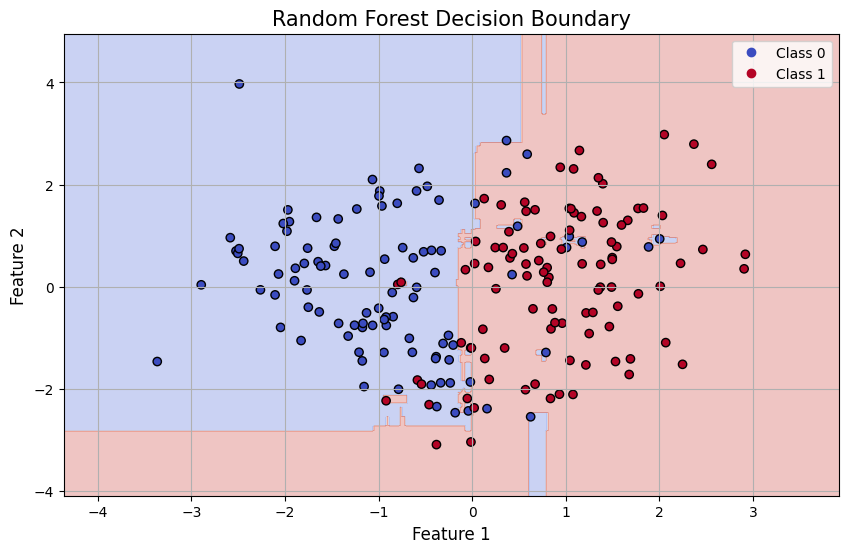

In [13]:
# 결정 경계 시각화를 위한 함수 정의
def plot_decision_boundary(X, y, model, title):
    # 캔버스 설정
    plt.figure(figsize=(10, 6))
    
    # 데이터의 최소/최대 값을 기반으로 그리드 생성
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # 그리드의 모든 점에 대해 예측 수행
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 결정 경계를 등고선 플롯으로 그림
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # 실제 데이터 포인트를 산점도로 그림
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    # 그래프 제목 및 라벨 설정
    plt.title(title, fontsize=15)
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
    plt.grid(True)
    plt.show()

# 전체 데이터셋에 대한 결정 경계 시각화
plot_decision_boundary(X, y, model, 'Random Forest Decision Boundary')

랜덤 포레스트의 또 다른 중요한 장점은 각 특성의 중요도(feature importance)를 제공한다는 것임. 이를 통해 어떤 특성이 예측에 더 큰 영향을 미치는지 파악할 수 있음.

Feature 1: 0.7882
Feature 2: 0.2118


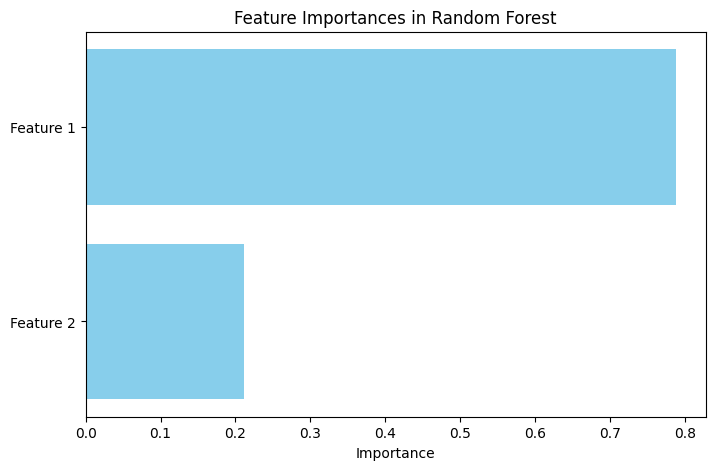

In [14]:
# 특성 중요도 추출 및 출력
feature_importances = model.feature_importances_
features = [f'Feature {i+1}' for i in range(X.shape[1])]

for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")

# 특성 중요도 시각화
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.show()

### 🤔 고려사항 (Considerations)

* <b>하이퍼파라미터 튜닝(Hyperparameter Tuning):</b> `n_estimators`(트리 개수), `max_depth`(트리 최대 깊이), `max_features`(분할에 사용할 특성 수)와 같은 하이퍼파라미터에 따라 모델 성능이 크게 달라질 수 있음. 최적의 조합을 찾기 위해 그리드 탐색(Grid Search)이나 랜덤 탐색(Random Search) 등을 활용하는 것이 좋음.
* <b>메모리 및 속도:</b> 포레스트에 포함된 트리의 수가 많아질수록 모델의 크기가 커져 메모리 사용량이 늘어나고, 예측 속도가 느려질 수 있음.
* <b>해석의 어려움:</b> 단일 결정 트리보다 모델의 구조가 복잡하여 예측 결과를 직관적으로 해석하기는 어려움. 하지만 특성 중요도를 통해 모델의 전반적인 행동을 이해할 수 있음.

### 📝 최종 요약 (Conclusion)

랜덤 포레스트는 여러 개의 결정 트리를 결합하여 단일 트리의 과적합 문제를 해결하고, 높은 예측 정확도를 달성하는 강력한 앙상블 모델임. 데이터 샘플링과 특성 선택에 무작위성을 부여하여 다양한 모델을 생성하고, 그 결과를 민주적인 방식으로 종합하여 안정적이고 신뢰도 높은 예측을 수행함.

이번 예제에서는 `scikit-learn`을 사용하여 랜덤 포레스트 모델을 구축하고, 분류 문제에 적용하여 그 성능과 결정 경계를 시각적으로 확인했음. 또한, 모델이 제공하는 특성 중요도 기능을 통해 어떤 특성이 예측에 중요한 역할을 하는지 분석할 수 있었음. 랜덤 포레스트는 그 강력한 성능과 사용 편의성 덕분에 다양한 분야에서 널리 활용되는 기본 모델 중 하나임.